In [64]:
# Problem Set 7: Simulating the Spread of Disease and Virus Population Dynamics 
# Name: Dar'ya Redka
# Collaborators:
# Time:

import numpy
import random
import pylab


In [127]:
# ''' 
# # Begin helper code
# '''

class NoChildException(Exception):
#     """
#     NoChildException is raised by the reproduce() method in the SimpleVirus
#     and ResistantVirus classes to indicate that a virus particle does not
#     reproduce. You can use NoChildException as is, you do not need to
#     modify/add any code.
#     """

# '''
# End helper code
    pass 

In [133]:
try:
    raise 0/0
except Exception:
    print("excepted")

excepted


In [116]:
# PROBLEM 1
#
class SimpleVirus(object):

    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):

#         """
#         Initialize a SimpleVirus instance, saves all parameters as attributes
#         of the instance.        
#         maxBirthProb: Maximum reproduction probability (a float between 0-1)        
#         clearProb: Maximum clearance probability (a float between 0-1).
#         """"""
        # TODO: DONE
    
        assert 0 <= maxBirthProb <= 1
        assert 0 <= clearProb <= 1
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def doesClear(self):

#         """ Stochastically determines whether this virus particle is cleared from the
#         patient's body at a time step. 
#         returns: True with probability self.clearProb and otherwise returns
#         False.
#         """
        # TODO: DONE 
        return random.random() <= self.clearProb
    
    def reproduce(self, popDensity):

#         """
#         Stochastically determines whether this virus particle reproduces at a
#         time step. Called by the update() method in the SimplePatient and
#         Patient classes. The virus particle reproduces with probability
#         self.maxBirthProb * (1 - popDensity).
        
#         If this virus particle reproduces, then reproduce() creates and returns
#         the instance of the offspring SimpleVirus (which has the same
#         maxBirthProb and clearProb values as its parent).         

#         popDensity: the population density (a float), defined as the current
#         virus population divided by the maximum population.         
        
#         returns: a new instance of the SimpleVirus class representing the
#         offspring of this virus particle. The child should have the same
#         maxBirthProb and clearProb values as this virus. Raises a
#         NoChildException if this virus particle does not reproduce.               
#         """
#         # TODO: DONE

        if random.random() <= self.maxBirthProb * (1 - popDensity):
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        else:
            raise NoChildException()

In [126]:
#test
virus = SimpleVirus(0.5, 0.5)
virus.reproduce(0.1)

NoChildException: 

In [119]:
class SimplePatient(object):

#     """
#     Representation of a simplified patient. The patient does not take any drugs
#     and his/her virus populations have no drug resistance.
#     """    

    def __init__(self, viruses, maxPop):

#         """
#         Initialization function, saves the viruses and maxPop parameters as
#         attributes.
#         viruses: the list representing the virus population (a list of
#         SimpleVirus instances)
#         maxPop: the  maximum virus population for this patient (an integer)
#         """
#         # TODO: DONE 

        assert type(viruses) == list
        assert type(maxPop) == int
        self.viruses = viruses
        self.maxPop = maxPop

    def getTotalPop(self):

#         """
#         Gets the current total virus population. 
#         returns: The total virus population (an integer)
#         """
#         # TODO: DONE        
        
        return len(self.viruses)

    def update(self):

#         """
#         Update the state of the virus population in this patient for a single
#         time step. update() should execute the following steps in this order:
        
#         - Determine whether each virus particle survives and updates the list
#         of virus particles accordingly.   
#         - The current population density is calculated. This population density
#           value is used until the next call to update() 
#         - Determine whether each virus particle should reproduce and add
#           offspring virus particles to the list of viruses in this patient.                    

#         returns: The total virus population at the end of the update (an
#         integer)
#         """

        # TODO: DONE
        
        survivors = []
        after_rep = []
        for virus in self.viruses:
            if not virus.doesClear():
                survivors.append(virus)
        popDensity = len(survivors)/self.maxPop
        for virus in survivors:
            after_rep.append(virus)
            try:
                after_rep.append(virus.reproduce(popDensity))
            except NoChildException:
                pass
        self.viruses = after_rep
        return self.getTotalPop()

In [81]:
#test
def createViruses(n, maxBirthProb, clearProb):
    viruses = []
    for i in range (1, n+1):
        virus = SimpleVirus(maxBirthProb, clearProb) 
        viruses.append(virus)
    return viruses
test_viruses = createViruses(50, 0.5, 0.5)
patient = SimplePatient(test_viruses, 500)
patient.update()

39

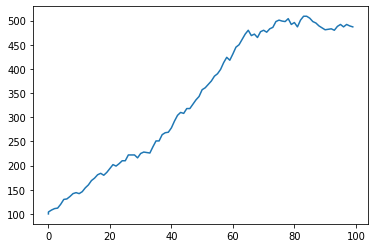

In [152]:
# PROBLEM 2
#
def simulationWithoutDrug():

#     """
#     Run the simulation and plot the graph for problem 2 (no drugs are used,
#     viruses do not have any drug resistance).    
#     Instantiates a patient, runs a simulation for 300 timesteps, and plots the
#     total virus population as a function of time.    
#     """
    # TODO: DONE
    viruses = createViruses(100, 0.1, 0.05)
    patient = SimplePatient(viruses, 1000)
    populations = []
    populations.append(len(viruses))
    steps = [0]
    for t in range (100):
        populations.append(patient.update())
#         print(patient.getTotalPop())
        steps.append(t)
    pylab.plot(steps, populations)
simulationWithoutDrug()
pylab.show()

In [121]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        return 0

In [123]:
divide(1, 0)

0

In [71]:
test_list = []
for i in range (5):
    if i < 3:
        test_list.append(i)
print(test_list)

[0, 1, 2]


In [72]:
# Problem #3.
import random 

def sim_diceRolls(nsets, nrolls):
    count = 0
    for i in range(nsets):
        roll_set = []
        for roll in range(nrolls):
            dice = random.randint(1,6)
            roll_set.append(dice)
        if len(set(roll_set)) == 1:
#             print(roll_set)
            count += 1
    return count/nsets

sim_diceRolls(10000, 5)

0.0007

In [135]:
import numpy 

def sim_trials(ntrials):
    trials = []
    for i in range(ntrials):
        trial = sim_diceRolls(10000, 5)
        trials.append(trial)
        array_trials = numpy.array(trials)
    print("MEAN = ", array_trials.mean(), ", STDEV = ", array_trials.std())

sim_trials(500)

MEAN =  0.0007702 , STDEV =  0.0002718307561700846


In [74]:
((1/6)**5)*6

0.0007716049382716047